In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline

##Read Data
First read in the raw data from the first worksheet (sheet 0). We're only interested in a few columns so let's just pull them out (DATE, STATION_NAME, and TPCP). Next create a datetime index so we can access the data by date.

In [106]:
df = pd.read_excel('Rainfall_Bushnell_Inverness_Brooksville_1900-2014_042116.xlsx', sheetname=0)
df = df[['DATE', 'STATION_NAME', 'TPCP']]
df.loc[df[df['TPCP']<0].index, 'TPCP'] = np.nan
df.DATE = pd.to_datetime(df.DATE, format='%Y%m%d')
df = df.set_index(['DATE'])
df.head()

,STATION_NAME,TPCP
DATE,,
1900-02-01,INVERNESS 3 SE FL US,4.59
1900-03-01,INVERNESS 3 SE FL US,6.33
1900-04-01,INVERNESS 3 SE FL US,6.43
1900-05-01,INVERNESS 3 SE FL US,4.54
1900-06-01,INVERNESS 3 SE FL US,5.86


In [107]:
stns = df.STATION_NAME.unique()
stns

array([u'INVERNESS 3 SE FL US', u'BUSHNELL 1 E FL US',
       u'BROOKSVILLE CHIN HIL FL US'], dtype=object)

##Compute Average Rainfall
Pull out the data rows corresponding to each station and concatenate this side-by-side, then compute the average.

In [119]:
inverness = df[df['STATION_NAME']==stns[0]]
bushnell = df[df['STATION_NAME']==stns[1]]
brooksville = df[df['STATION_NAME']==stns[2]]
prcp = pd.concat([inverness.TPCP, bushnell.TPCP, brooksville.TPCP], axis=1)
prcp.columns = ['inverness', 'bushnell', 'brooksville']
prcp['avg'] = prcp.mean(axis=1)
prcp.head()

,inverness,bushnell,brooksville,avg
DATE,,,,
1900-01-01,NaN,NaN,3.01,3.010
1900-02-01,4.59,NaN,3.45,4.020
1900-03-01,6.33,NaN,6.85,6.590
1900-04-01,6.43,NaN,8.05,7.240
1900-05-01,4.54,NaN,4.77,4.655


In [109]:
# Look at just the 2005 data
prcp['2005']

,inverness,bushnell,brooksville,avg
DATE,,,,
2005-01-01,0.10,1.38,1.62,1.033333
2005-02-01,0.99,1.36,1.76,1.370000
2005-03-01,3.12,3.70,3.32,3.380000
2005-04-01,2.90,2.96,3.08,2.980000
2005-05-01,5.38,4.12,4.72,4.740000
2005-06-01,8.93,3.52,6.14,6.196667
2005-07-01,6.91,10.25,11.09,9.416667
2005-08-01,9.93,NaN,8.62,9.275000
2005-09-01,2.04,0.88,1.26,1.393333


In [110]:
# Compute annual totals from the monthly averages for 1900 through 2014
prcpA = prcp['1900':'2014'].avg.resample('A', how='sum')
prcpA.head()

DATE
1900-12-31    56.715
1901-12-31    60.980
1902-12-31    47.170
1903-12-31    53.545
1904-12-31    46.155
Freq: A-DEC, Name: avg, dtype: float64

In [111]:
# Find the mean of the annual totals
prcpA.mean()

52.587130434782615

In [112]:
# Look at the annual totals for 2000 through the end of the dataset (2014)
prcpA['2000':]

DATE
2000-12-31    36.926667
2001-12-31    52.793333
2002-12-31    62.953333
2003-12-31    60.866667
2004-12-31    53.380000
2005-12-31    50.140000
2006-12-31    38.215000
2007-12-31    47.425000
2008-12-31    41.128333
2009-12-31    45.031667
2010-12-31    42.810000
2011-12-31    45.093333
2012-12-31    50.020000
2013-12-31    43.760000
2014-12-31    56.355000
Freq: A-DEC, Name: avg, dtype: float64

In [113]:
# Compute departures from the longterm (1900-2014) mean
departure = prcpA - prcpA.mean()
departure.head()

DATE
1900-12-31    4.12787
1901-12-31    8.39287
1902-12-31   -5.41713
1903-12-31    0.95787
1904-12-31   -6.43213
Freq: A-DEC, Name: avg, dtype: float64

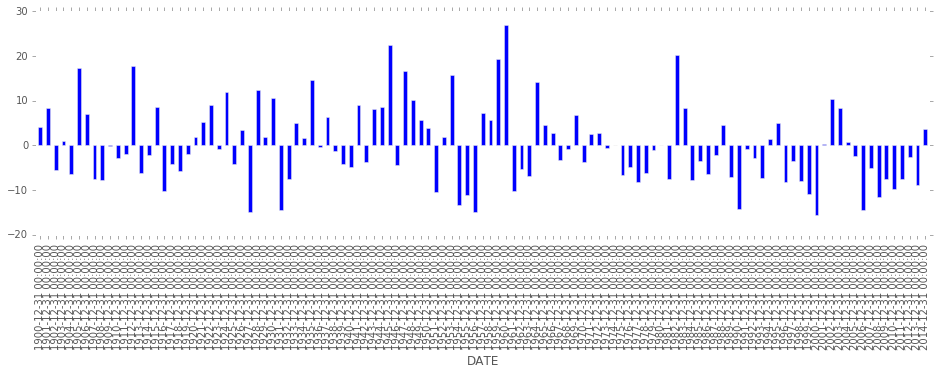

In [118]:
departure.plot(kind='bar', figsize=(16, 4))

In [115]:
# Compute surplus or deficit for 1900-1937
departure['1900':'1937'].sum()

43.235710144927339

In [116]:
# Compute surplus or deficit for 1938-1975
departure['1938':'1975'].sum()

89.447376811593955

In [117]:
# Compute surplus or deficit for 1976-2014
departure['1976':'2014'].sum()

-132.683086956522